In [3]:
import umap
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import matplotlib.cm as cm

#UMAP_function

def plot_umap(data, labels, title="UMAP Plot", cmap = "Set2", random_state=42):
    reducer = umap.UMAP(random_state=random_state)
    X_umap = reducer.fit_transform(data)
    
    colors = cm.get_cmap(cmap, len(set(labels)))

    fig, ax = plt.subplots(figsize=(10, 8))
    for category in set(labels):
        idx = labels == category
        ax.scatter(X_umap[idx, 0], X_umap[idx, 1], color=colors(category), label=f"class {category + 1}")

    ax.legend(title="Classes")
    ax.set_title(title)
    ax.set_xlabel("UMAP dimension 1")
    ax.set_ylabel("UMAP dimension 2")
    ax.spines["right"].set_color("none")
    ax.spines["top"].set_color("none")

    plt.show()

c:\Users\4019-tjyen\anaconda\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\4019-tjyen\AppData\Local\Temp\ipykernel_42092\4060602962.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap(cmap, len(set(labels)))


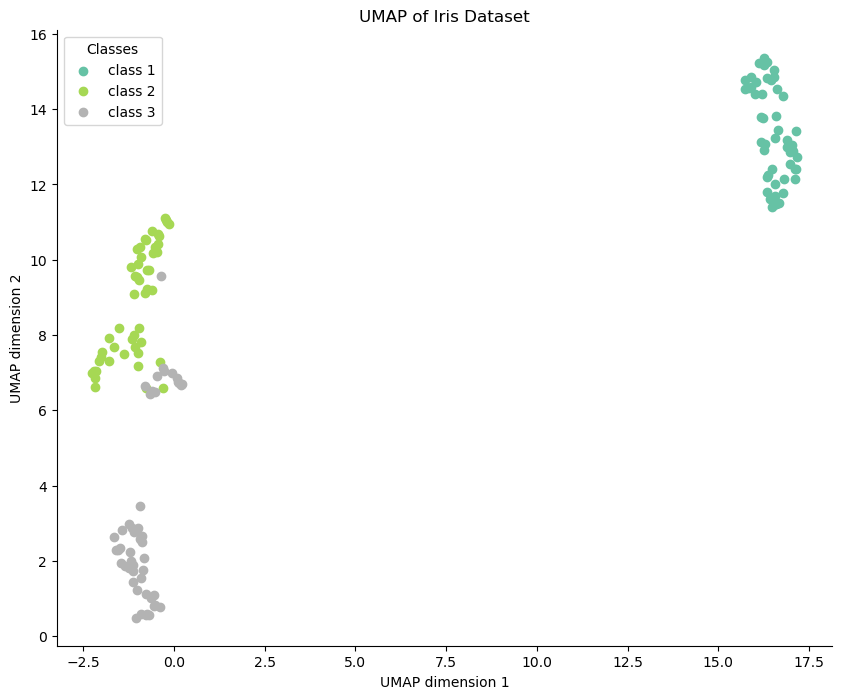

In [4]:
#function use

iris = load_iris()
X = iris.data
y = iris.target


plot_umap(X, y, title = "UMAP of Iris Dataset")